In [81]:

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [82]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [83]:
!pip install yfinance
import yfinance as yf

start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,1,1)

google = yf.download("GOOGL",start,end)


[*********************100%***********************]  1 of 1 completed


In [84]:
google.to_csv('GOOGL_Stock.csv')


In [85]:
df = pd.read_csv("GOOGL_Stock.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
1,2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2,2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
3,2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
4,2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000


In [86]:
training_set = df.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[ 67.42050171]
 [ 67.40000153]
 [ 67.58149719]
 [ 70.02300262]
 [ 69.74099731]
 [ 71.09649658]
 [ 71.47350311]
 [ 71.76249695]
 [ 72.        ]
 [ 71.65100098]
 [ 72.27249908]
 [ 73.1269989 ]
 [ 73.94999695]
 [ 74.4865036 ]
 [ 74.37750244]
 [ 74.64099884]
 [ 71.57700348]
 [ 72.08699799]
 [ 72.92299652]
 [ 71.90499878]
 [ 73.39299774]
 [ 73.08249664]
 [ 72.72450256]
 [ 73.18049622]
 [ 72.59899902]
 [ 73.36949921]
 [ 73.8615036 ]
 [ 75.66349792]
 [ 75.79299927]
 [ 75.5       ]
 [ 75.72650146]
 [ 75.71700287]
 [ 76.36000061]
 [ 75.95050049]
 [ 75.22899628]
 [ 71.15249634]
 [ 71.55000305]
 [ 69.74900055]
 [ 67.95700073]
 [ 63.71549988]
 [ 67.56950378]
 [ 69.88400269]
 [ 67.94799805]
 [ 67.27749634]
 [ 63.49750137]
 [ 60.2480011 ]
 [ 62.7195015 ]
 [ 62.41350174]
 [ 56.13100052]
 [ 58.74950027]
 [ 54.48049927]
 [ 54.5320015 ]
 [ 52.99700165]
 [ 54.4109993 ]
 [ 56.54499817]
 [ 52.81850052]
 [ 55.19900131]
 [ 56.22900009]
 [ 55.73600006]
 [ 56.37350082]
 [ 56.63199997]
 [ 57.43650055]
 [ 56.20

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.15029285],
       [0.15008185],
       [0.15194991],
       [0.1770794 ],
       [0.17417683],
       [0.18812846],
       [0.19200885],
       [0.19498335],
       [0.19742788],
       [0.19383577],
       [0.20023261],
       [0.20902765],
       [0.21749846],
       [0.22302052],
       [0.22189861],
       [0.22461068],
       [0.19307414],
       [0.19832332],
       [0.20692793],
       [0.19645007],
       [0.21176548],
       [0.20856961],
       [0.20488491],
       [0.20957828],
       [0.20359315],
       [0.21152362],
       [0.21658763],
       [0.23513487],
       [0.23646778],
       [0.23345205],
       [0.23578334],
       [0.23568558],
       [0.24230371],
       [0.23808888],
       [0.23066271],
       [0.18870485],
       [0.19279623],
       [0.1742592 ],
       [0.15581483],
       [0.11215867],
       [0.15182647],
       [0.17564873],
       [0.15572217],
       [0.14882095],
       [0.1099149 ],
       [0.07646902],
       [0.10190724],
       [0.098

In [88]:
x_train =[]
y_train =[]
for i in range(30,505):
    x_train.append(scaled_training_set[i-30:i,0])
    y_train.append(scaled_training_set[i,0])
    
x_train =np.array(x_train)
y_train =np.array(y_train)

In [89]:
print(x_train.shape)
print(y_train.shape)

(475, 30)
(475,)


In [90]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(475, 30, 1)

In [91]:
!pip install keras


In [40]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [92]:
regressor = Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape= (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))



In [93]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=50,batch_size=12)

Epoch 1/50
40/40 [==============================] - 21s 74ms/step - loss: 0.0481
Epoch 2/50
40/40 [==============================] - 2s 59ms/step - loss: 0.0074
Epoch 3/50
40/40 [==============================] - 1s 36ms/step - loss: 0.0071
Epoch 4/50
40/40 [==============================] - 2s 58ms/step - loss: 0.0073
Epoch 5/50
40/40 [==============================] - 2s 60ms/step - loss: 0.0066
Epoch 6/50
40/40 [==============================] - 2s 58ms/step - loss: 0.0068
Epoch 7/50
40/40 [==============================] - 3s 69ms/step - loss: 0.0074
Epoch 8/50
40/40 [==============================] - 2s 61ms/step - loss: 0.0072
Epoch 9/50
40/40 [==============================] - 2s 57ms/step - loss: 0.0064
Epoch 10/50
40/40 [==============================] - 2s 44ms/step - loss: 0.0048
Epoch 11/50
40/40 [==============================] - 2s 61ms/step - loss: 0.0057
Epoch 12/50
40/40 [==============================] - 3s 69ms/step - loss: 0.0053
Epoch 13/50
40/40 [=================

In [94]:
googletest = yf.download("GOOGL",start='2022-1-1',end='2023-5-8')


[*********************100%***********************]  1 of 1 completed


In [99]:
googletest.to_csv('GOOGL_Stock_test.csv')


In [100]:
dataset_test=pd.read_csv("GOOGL_Stock_test.csv")

In [101]:
actual_stock_price=dataset_test.iloc[:,1:2].values

In [103]:
dataset_total=[]
dataset_total = pd.concat((df['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-30:].values

inputs =inputs.reshape(-1,1)
inputs= scaler.transform(inputs)

x_test=[]
for i in range(30,80):
    x_test.append(inputs[i-30:i,0])
    
x_test =np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [75]:
predicted_stock_price =regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 10s 12ms/step


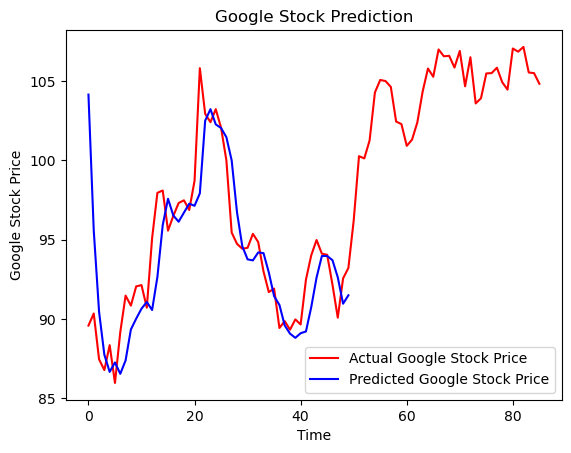

In [80]:
plt.plot(actual_stock_price,color='red',label ='Actual Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label ='Predicted Google Stock Price')
plt.title('Google Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()